visualizacao inicial do dataframe:
                                                 url  \
0  https://www.acidadeon.com/ribeiraopreto/econom...   
1  https://www.acidadeon.com/ribeiraopreto/econom...   
2  https://www.acidadeon.com/ribeiraopreto/econom...   
3  https://www.acidadeon.com/ribeiraopreto/econom...   
4  https://www.acidadeon.com/ribeiraopreto/econom...   

                                              titulo  \
0  Aeroporto de Franca reabre após 4 anos e receb...   
1  Inscrições para concurso com salários de R$ 11...   
2  Moradores do interior de SP ganham prêmios da ...   
3  Mega-Sena premia apostadores do interior de SP...   
4  Governo de SP isenta IPVA de veículos não polu...   

                                           descricao        tags  \
0  Economia - Aeroporto de Franca reabre após 4 a...  [Economia]   
1  Economia - Inscrições para concurso com salári...  [Economia]   
2  Economia - Moradores do interior de SP ganham ...  [Economia]   
3  Economia - Mega-

<ipython-input-5-2d50ac96b440>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=noticias_por_dia.index, y=noticias_por_dia.values, palette='viridis')


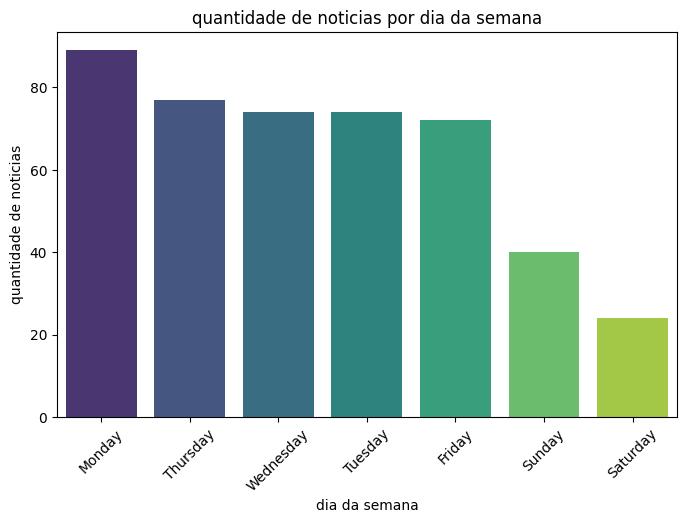

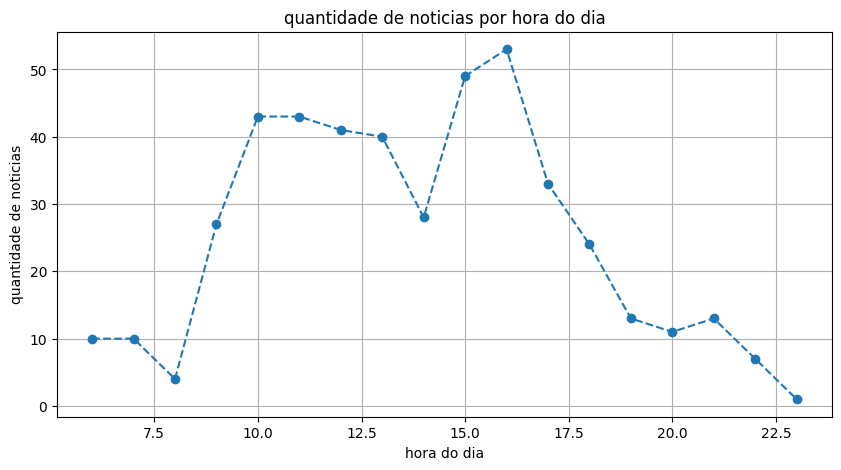

<ipython-input-5-2d50ac96b440>:55: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_resumo_tempo = df['data'].dt.to_period('M').value_counts().sort_index()


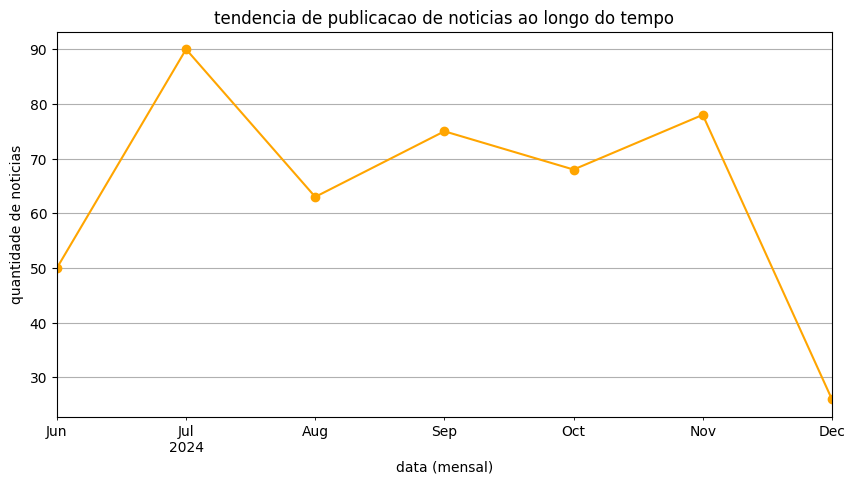

<ipython-input-5-2d50ac96b440>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tamanho_medio', y='tag', data=df_tamanho_tag.head(10), palette='coolwarm')


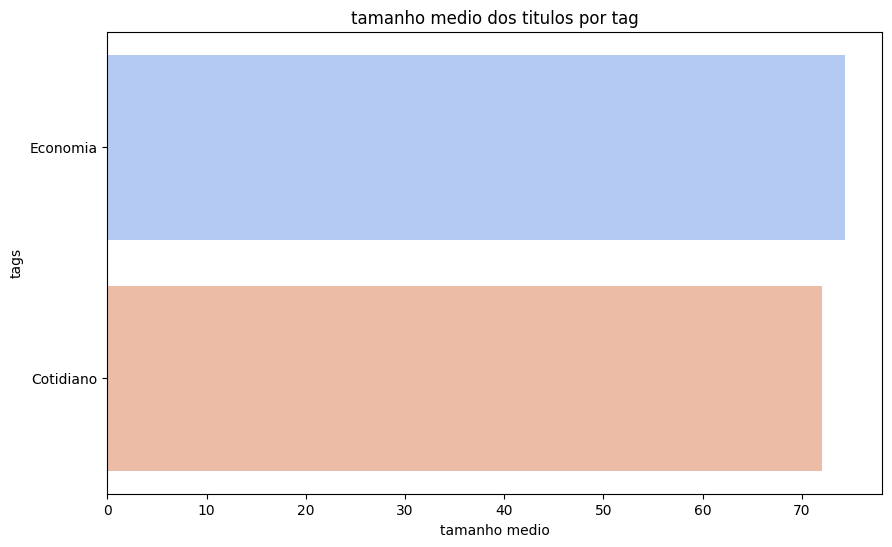

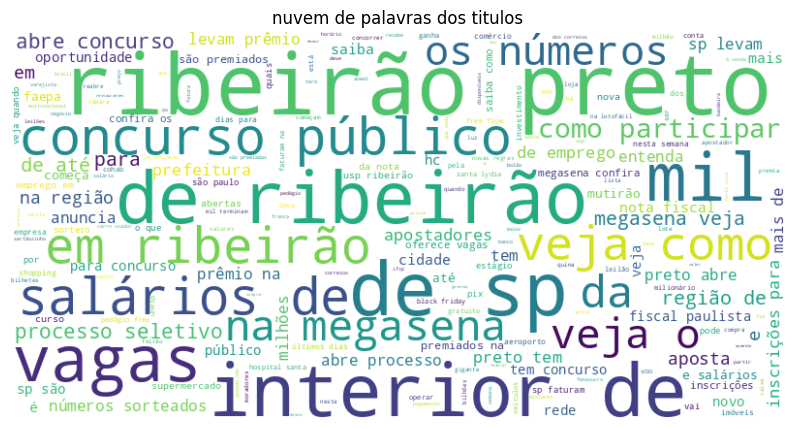

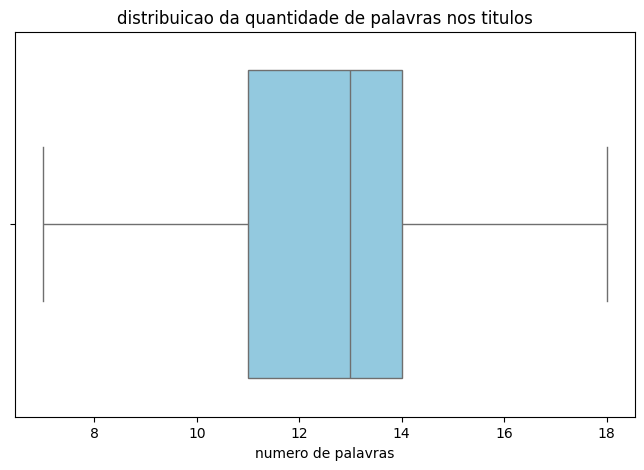

<ipython-input-5-2d50ac96b440>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tags_mais_comuns.values, y=tags_mais_comuns.index, palette='Blues_r')


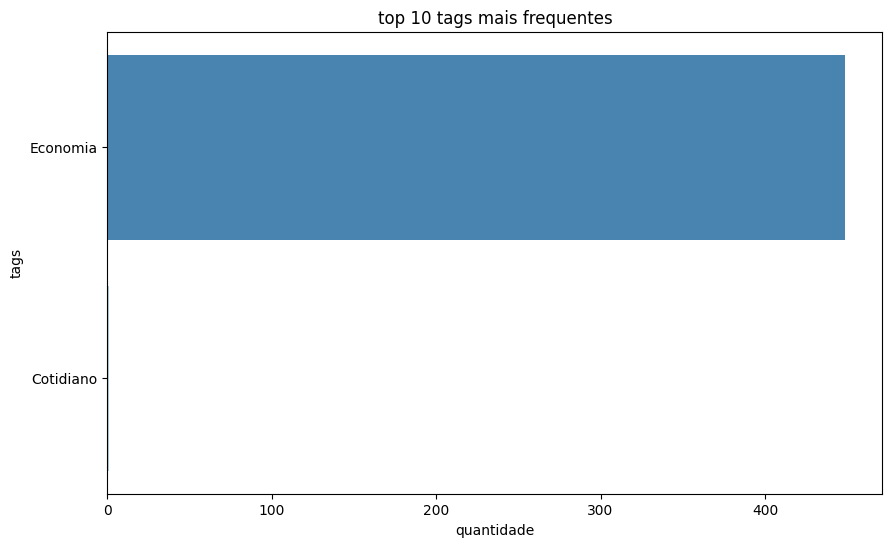

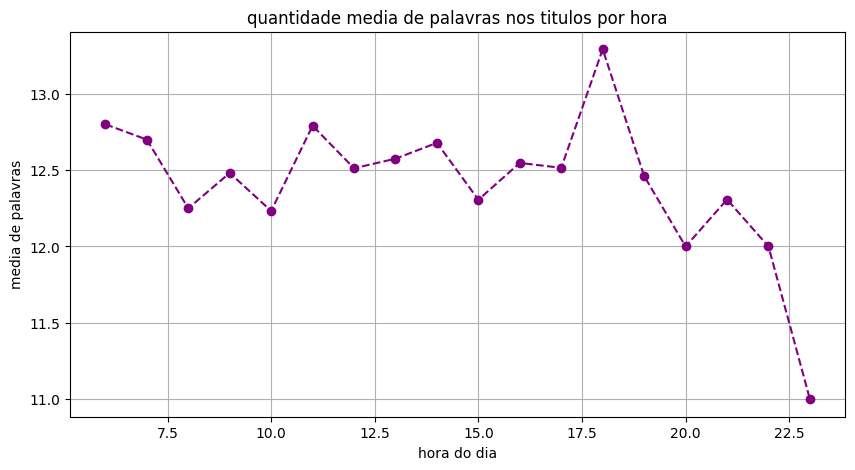

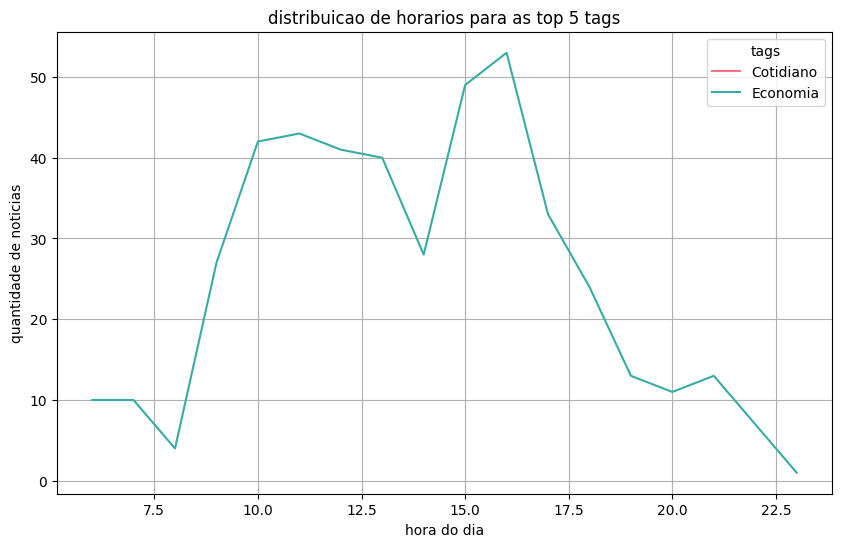


resumo estatistico:
numero total de noticias: 450
data mais antiga: 2024-06-13 18:43:00-03:00
data mais recente: 2024-12-14 15:47:44-03:00
tamanho medio dos titulos: 74.41 caracteres
quantidade media de palavras nos titulos: 12.53


In [5]:
# importar bibliotecas necessarias
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import wordcloud
import re
import seaborn as sns

# carregar o arquivo noticias.json
caminho_arquivo = '/content/data/noticias.json'

# ler o arquivo json
with open(caminho_arquivo, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# converter os dados json em um dataframe pandas
df = pd.DataFrame(dados)

# visualizar as primeiras linhas do dataframe
print('visualizacao inicial do dataframe:')
print(df.head())

# converter datas e criar colunas adicionais
df['data'] = pd.to_datetime(df['data'])
df['dia_da_semana'] = df['data'].dt.day_name()
df['hora'] = df['data'].dt.hour
df['ano'] = df['data'].dt.year

# calcular tamanho dos titulos
df['tamanho_titulo'] = df['titulo'].apply(len)
df['quantidade_palavras_titulo'] = df['titulo'].apply(lambda x: len(x.split()))

# 1. quantidade de noticias por dia da semana
noticias_por_dia = df['dia_da_semana'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=noticias_por_dia.index, y=noticias_por_dia.values, palette='viridis')
plt.title('quantidade de noticias por dia da semana')
plt.xlabel('dia da semana')
plt.ylabel('quantidade de noticias')
plt.xticks(rotation=45)
plt.show()

# 2. quantidade de noticias por hora do dia
noticias_por_hora = df['hora'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(noticias_por_hora.index, noticias_por_hora.values, marker='o', linestyle='--')
plt.title('quantidade de noticias por hora do dia')
plt.xlabel('hora do dia')
plt.ylabel('quantidade de noticias')
plt.grid()
plt.show()

# 3. distribuicao temporal das noticias
df_resumo_tempo = df['data'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 5))
df_resumo_tempo.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('tendencia de publicacao de noticias ao longo do tempo')
plt.xlabel('data (mensal)')
plt.ylabel('quantidade de noticias')
plt.grid()
plt.show()

# 4. tamanho medio dos titulos por tag
df['tags'] = df['tags'].apply(lambda x: x if isinstance(x, list) else [])
tamanho_por_tag = []
for tag in df['tags'].explode().unique():
    tamanho_medio = df[df['tags'].apply(lambda x: tag in x)]['tamanho_titulo'].mean()
    tamanho_por_tag.append((tag, tamanho_medio))

df_tamanho_tag = pd.DataFrame(tamanho_por_tag, columns=['tag', 'tamanho_medio']).dropna().sort_values(by='tamanho_medio', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='tamanho_medio', y='tag', data=df_tamanho_tag.head(10), palette='coolwarm')
plt.title('tamanho medio dos titulos por tag')
plt.xlabel('tamanho medio')
plt.ylabel('tags')
plt.show()

# 5. palavras mais frequentes nos titulos
todos_titulos = ' '.join(df['titulo'])
texto_limpo_titulos = re.sub(r'[^a-zA-Zà-úÀ-Ú\s]', '', todos_titulos)
palavras_titulos = [palavra.lower() for palavra in texto_limpo_titulos.split()]
contador_palavras_titulos = Counter(palavras_titulos)

wc_titulos = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(' '.join(palavras_titulos))
plt.figure(figsize=(10, 6))
plt.imshow(wc_titulos, interpolation='bilinear')
plt.axis('off')
plt.title('nuvem de palavras dos titulos')
plt.show()

# 6. boxplot da quantidade de palavras nos titulos
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['quantidade_palavras_titulo'], color='skyblue')
plt.title('distribuicao da quantidade de palavras nos titulos')
plt.xlabel('numero de palavras')
plt.show()

# 7. top 10 tags mais frequentes
tags_exploded = df['tags'].explode()
tags_mais_comuns = tags_exploded.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=tags_mais_comuns.values, y=tags_mais_comuns.index, palette='Blues_r')
plt.title('top 10 tags mais frequentes')
plt.xlabel('quantidade')
plt.ylabel('tags')
plt.show()

# 8. analise entre hora e tamanho medio do titulo
media_palavras_hora = df.groupby('hora')['quantidade_palavras_titulo'].mean()
plt.figure(figsize=(10, 5))
plt.plot(media_palavras_hora.index, media_palavras_hora.values, marker='o', color='purple', linestyle='--')
plt.title('quantidade media de palavras nos titulos por hora')
plt.xlabel('hora do dia')
plt.ylabel('media de palavras')
plt.grid()
plt.show()

# 9. distribuicao de horarios para as top 5 tags
tags_hora = df.explode('tags').groupby(['tags', 'hora']).size().reset_index(name='quantidade')
top_5_tags = tags_exploded.value_counts().head(5).index
tags_hora_filtrado = tags_hora[tags_hora['tags'].isin(top_5_tags)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=tags_hora_filtrado, x='hora', y='quantidade', hue='tags', palette='husl')
plt.title('distribuicao de horarios para as top 5 tags')
plt.xlabel('hora do dia')
plt.ylabel('quantidade de noticias')
plt.legend(title='tags')
plt.grid()
plt.show()

# 10. resumo estatistico
print('\nresumo estatistico:')
print(f'numero total de noticias: {len(df)}')
print(f'data mais antiga: {df["data"].min()}')
print(f'data mais recente: {df["data"].max()}')
print(f'tamanho medio dos titulos: {df["tamanho_titulo"].mean():.2f} caracteres')
print(f'quantidade media de palavras nos titulos: {df["quantidade_palavras_titulo"].mean():.2f}')
